# ALBERT(A Lite BERT for Self-supervised Learning of Language Representations)
- BERT는 Per-trained 모델이기 때문에 크기가 커질수록 성능이 향상
- BERT의 문제
    - 모델의 크기가 너무 크면 out of memory 발생
    - 학습에 필요한 시간이 너무 오래 걸림
- ALBERT는 몇 가지 새로운 아이디어로 BERT의 문제를 해결한 모델



## Cross-Layer Parameter Sharing
- BERT의 large 버전에는 24개의 레이어가 있는 반면 base 버전에는 12개의 레이어가 있음.
- 더 많은 레이어를 추가하면 모델 파라미터 수가 기하급수적으로 늘어남.
- ALBERT는 첫번째 레이어의 파라미터를 다른 레이어와 공유


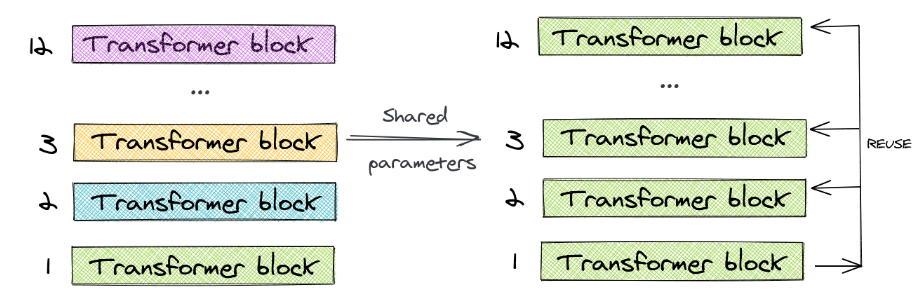

## Sentence-Order Prediction
- 문장의 순서를 바꿔서 순서가 올바른지를 예측


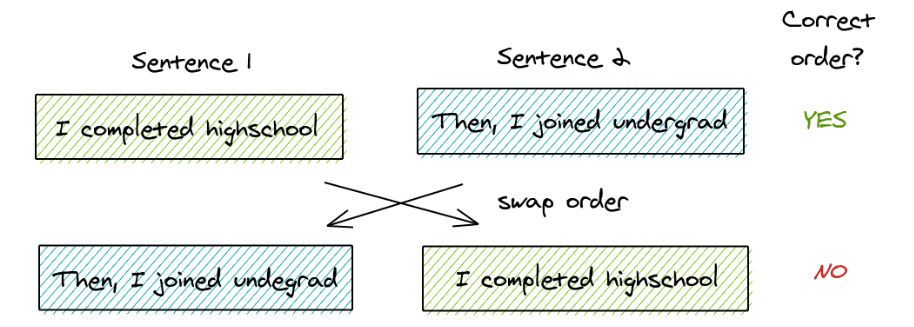

## Factorized Embedding Parameterization
- 큰 차원에 임베딩(V X H)으로 투영하는 대신 낮은 차원에 임베딩(V X E)으로 투영하고 히든 공간(E X H)으로 투영함

- BERT 임베딩 방식

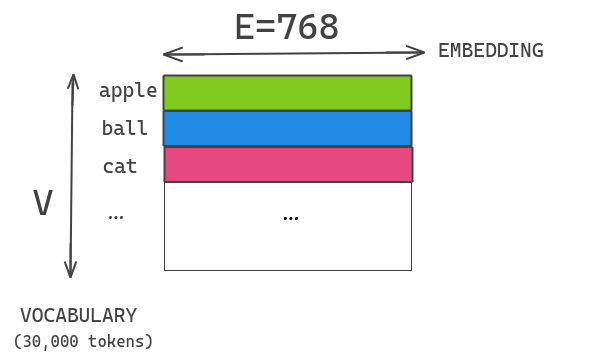

- ALBERT 임베딩 방식

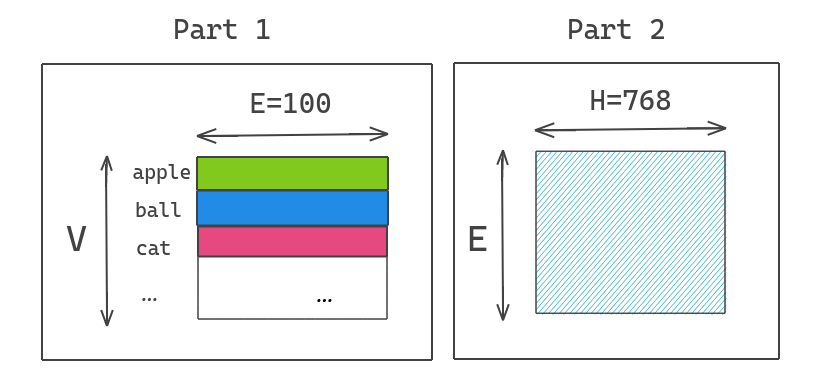

In [1]:
vocab_size = 10000
emb_dim = 768

vocab_size * emb_dim

7680000

In [2]:
vocab_size * 100 + 100 * emb_dim

1076800

# ELECTRA
- 교체한 토큰 탐지 방식으로 사전 학습
- 생성자(Generator)와 판별자(Discriminator)가 있는데 생성자가 마스킹된 토큰을 예측하면 판별자가 해당 토큰이 맞는지 아닌지를 판별하도록 모델을 학습


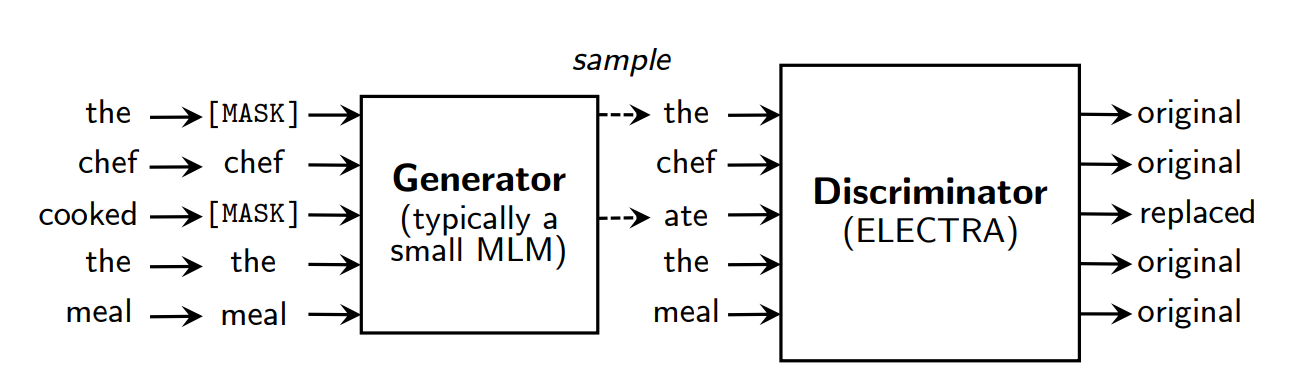

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

DATA_PATH = os.getcwd() +'/data/review/'
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
train = pd.read_csv(f"{DATA_PATH}review_train.csv")
test = pd.read_csv(f"{DATA_PATH}review_test.csv")
train.shape, test.shape

((2000, 3), (1000, 2))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   object
 1   review  2000 non-null   object
 2   target  2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [6]:
train.head()

,id,review,target
0,train_0,이런 최고의 영화를 이제서야 보다니,1
1,train_1,안봤지만 유승준나와서 비추.,0
2,train_2,시대를 못 따라간 연출과 촌스러운 영상미.,0
3,train_3,원소전 굿,1
4,train_4,ㅋㅋㅋㅋ 개봉영화평점단사람이1명 ㅋㅋㅋㅋ,1


- 사전학습 모델 아이디

In [7]:
model_name = "JKKANG/ALBERT-kor-emotion"

In [8]:
from transformers import AutoTokenizer, AutoModel

In [9]:
model = AutoModel.from_pretrained(model_name)
model

config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

c:\Users\hopio\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hopio\.cache\huggingface\hub\models--JKKANG--ALBERT-kor-emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/52.8M [00:00<?, ?B/s]

AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(42000, 128, padding_idx=0)
    (position_embeddings): Embedding(256, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (attention_dropout): Dropout(p=0, inplace=False)
      

In [10]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/362 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/344k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [11]:
tokenizer.model_max_length

256

In [12]:
model.config

AlbertConfig {
  "_name_or_path": "JKKANG/ALBERT-kor-emotion",
  "architectures": [
    "AlbertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0,
  "bos_token_id": 2,
  "classifier_dropout_prob": 0.1,
  "down_scale_factor": 1,
  "embedding_size": 128,
  "eos_token_id": 3,
  "gap_size": 0,
  "hidden_act": "gelu_new",
  "hidden_dropout_prob": 0,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6"
  },
  "initializer_range": 0.02,
  "inner_group_num": 1,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 256,
  "model_type": "albert",
  "net_structure_type": 0,
  "num_attention_heads": 12,
  "num_hidden_groups": 1,
  "num_hidden_layers": 12,
  "num_memory_blocks": 0,
  "p

In [13]:
text = train["review"][0]
text

'이런 최고의 영화를 이제서야 보다니'

In [14]:
tokenizer(text)

{'input_ids': [2, 14119, 16001, 21005, 30399, 14725, 8089, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

# 학습 데이터 to ndarray

In [15]:
train_arr = train["review"].to_numpy()
test_arr = test["review"].to_numpy()

train_arr.shape, test_arr.shape

((2000,), (1000,))

# 정답데이터

In [16]:
target = train["target"].to_numpy().reshape(-1,1)
target.shape

(2000, 1)

# 배치 단위 padding

## 데이터셋 클래스

In [17]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, x, y = None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx] if self.y is not None else None

In [18]:
class CollateFN:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
    def __call__(self, batch):
        x_list = []
        y_list = []
        for x, y in batch:
            x_list.append(x)
            if y is not None: # 정답데이터가 있을 경우
                y_list.append(y)

        x = self.tokenizer(x_list, padding=True, truncation=True, max_length=self.tokenizer.model_max_length,return_tensors="pt")

        y = torch.Tensor(np.array(y_list)) if len(y_list) else None
        return { "x":x, "y":y }

collate_fn = CollateFN(tokenizer)

In [19]:
dt = ReviewDataset(train_arr, target)
dl = torch.utils.data.DataLoader(dt, batch_size=2, shuffle=False, collate_fn=collate_fn)
batch = next(iter(dl))
batch

{'x': {'input_ids': tensor([[    2, 14119, 16001, 21005, 30399, 14725,  8089,     3,     0],
         [    2,  5508, 19747, 38988,  8510, 41957, 22742,  2016,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0],
         [1, 1, 1, 1, 1, 1, 1, 1, 1]])},
 'y': tensor([[1.],
         [0.]])}

In [20]:
outputs = model(**batch["x"])

In [21]:
outputs.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [22]:
outputs["last_hidden_state"].shape # b, s, f

torch.Size([2, 9, 768])

In [23]:
outputs["pooler_output"].shape # b, f

torch.Size([2, 768])

In [24]:
outputs[0].shape,  outputs[1].shape

(torch.Size([2, 9, 768]), torch.Size([2, 768]))

In [25]:
model.config.hidden_size

768

## 모델 클래스

In [26]:
class Net(torch.nn.Module):
    def __init__(self, model_name):
        super().__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.fc_out = torch.nn.Linear(self.model.config.hidden_size, 1)

    def forward(self, x):
        x = self.model(**x)
        return self.fc_out(x[1]) # cls 토큰 출력을 fc layer 전달하여 예측

In [27]:
model = Net(model_name)
model(batch["x"])

tensor([[-0.0554],
        [ 0.2295]], grad_fn=<AddmmBackward0>)

## 학습 loop 함수

In [28]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    epoch_loss = 0
    model.train() # 학습 모드
    for batch in dataloader:
        pred = model( batch["x"].to(device) )
        loss = loss_fn( pred, batch["y"].to(device) )

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

## 검증및 테스트 loop 함수

In [29]:
@torch.no_grad()
def test_loop(dataloader, model, loss_fn, device):
    epoch_loss = 0
    pred_list = []
    act_func = torch.nn.Sigmoid()
    model.eval() # 평가 모드
    for batch in dataloader:
        pred = model( batch["x"].to(device) )
        if batch.get("y") is not None:
            loss = loss_fn( pred, batch["y"].to(device) )
            epoch_loss += loss.item()

        pred = act_func(pred) # logit 값을 확률로 변환
        pred = pred.to("cpu").numpy() # cpu 이동후 ndarray 로변환
        pred_list.append(pred)

    epoch_loss /= len(dataloader)
    pred = np.concatenate(pred_list)
    return epoch_loss, pred

## 하이퍼파라미터

In [30]:
!pip install sentencepiece

   ---------------------------------------- 0.0/992.0 kB ? eta -:--:--
   --------------------------------------- 992.0/992.0 kB 11.6 MB/s eta 0:00:00


In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
n_splits = 5
cv = KFold(n_splits, shuffle=True, random_state=SEED)

batch_size = 16 # 배치 사이즈
loss_fn = torch.nn.BCEWithLogitsLoss() # 손실 객체
epochs = 100 # 최대 가능한 에폭수

model_name = 'JKKANG/ALBERT-kor-emotion' # 사전학습 모델 id
tokenizer = AutoTokenizer.from_pretrained(model_name) # 지정한 사전학습 모델의 토크나이저

In [32]:
tokenizer.model_max_length

256

## 학습

In [33]:
is_holdout = False
reset_seeds(SEED) # 재현을 위해 시드고정
best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train_arr) ):
    # 학습용 데이터로더 객체
    train_dt = ReviewDataset(train_arr[tri], target[tri])
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    # 검증용 데이터로더 객체
    valid_dt = ReviewDataset(train_arr[vai], target[vai])
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    # 모델 객체와 옵티마이저 객체 생성
    model = Net(model_name).to(device)
    optimizer = torch.optim.Adam( model.parameters(), lr=2e-5 )

    best_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    for epoch in tqdm(range(epochs)):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)

        pred = (pred > 0.5).astype(int) # 이진분류 문제에서 클래스 번호 결정
        score = accuracy_score(target[vai], pred)

        #print(train_loss, valid_loss, score)
        if score > best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), f"{DATA_PATH}/weight/albert_model_{i}.pth") # 최고 점수 모델 가중치 저장

        patience += 1
        if patience == 5:
            break

    print(f"{i}번째 폴드 최고 정확도: {best_score}")
    best_score_list.append(best_score)

    del model # 변수 삭제
    import gc
    gc.collect() # 메모리 청소
    torch.cuda.empty_cache()  # gpu 메모리 청소

    if is_holdout:
        break

  0%|          | 0/100 [00:00<?, ?it/s]

0번째 폴드 최고 정확도: 0.82


  0%|          | 0/100 [00:00<?, ?it/s]

1번째 폴드 최고 정확도: 0.825


  0%|          | 0/100 [00:00<?, ?it/s]

2번째 폴드 최고 정확도: 0.8475


  0%|          | 0/100 [00:00<?, ?it/s]

3번째 폴드 최고 정확도: 0.8525


  0%|          | 0/100 [00:00<?, ?it/s]

4번째 폴드 최고 정확도: 0.8375


# 최대 길이를 지정해서 padding

In [34]:
tokenizer = AutoTokenizer.from_pretrained("kykim/electra-kor-base")

tokenizer_config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

c:\Users\hopio\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hopio\.cache\huggingface\hub\models--kykim--electra-kor-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/344k [00:00<?, ?B/s]

In [35]:
tokenizer.model_max_length

512

In [36]:
model = AutoModel.from_pretrained("kykim/electra-kor-base")
model

pytorch_model.bin:   0%|          | 0.00/473M [00:00<?, ?B/s]

ElectraModel(
  (embeddings): ElectraEmbeddings(
    (word_embeddings): Embedding(42000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): ElectraEncoder(
    (layer): ModuleList(
      (0-11): 12 x ElectraLayer(
        (attention): ElectraAttention(
          (self): ElectraSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): ElectraSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0

In [37]:
model.config

ElectraConfig {
  "_name_or_path": "kykim/electra-kor-base",
  "architectures": [
    "ElectraForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "transformers_version": "4.43.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 42000
}

In [38]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, tokenizer, x, y = None):
        self.tokenizer = tokenizer
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        item = {}
        x = self.tokenizer(self.x[idx], padding="max_length", truncation=True, return_tensors="pt") # 배치차원 포함해서 반환
        for k, v in x.items():
            x[k] = v[0] # 배치차원 제거하기 위해 value 인덱싱
        item["x"] = x
        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])
        return item

dt = ReviewDataset(tokenizer, train_arr, target)
dl = torch.utils.data.DataLoader(dt, batch_size=2, shuffle=True)
batch = next(iter(dl))
batch

{'x': {'input_ids': tensor([[    2, 25074,     1,  ...,     0,     0,     0],
         [    2, 16707,  8013,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]])},
 'y': tensor([[0.],
         [1.]])}

In [39]:
outputs = model(**batch["x"])
outputs.keys()

odict_keys(['last_hidden_state'])

In [40]:
outputs[0].shape # b, s, f

torch.Size([2, 512, 768])

In [41]:
outputs[0][:,0].shape # b , f , cls 토큰 출력을 가져오기 위해 seq 차원 인덱싱!!

torch.Size([2, 768])

In [42]:
class Net(torch.nn.Module):
    def __init__(self, model_name):
        super().__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.fc_out = torch.nn.Linear(self.model.config.hidden_size, 1)

    def forward(self, x):
        x = self.model(**x)
        return self.fc_out(x[0][:,0]) # cls 토큰 출력을 fc layer 전달하여 예측

In [43]:
model = Net("kykim/electra-kor-base")
model(batch["x"])

tensor([[-0.0322],
        [-0.0038]], grad_fn=<AddmmBackward0>)

## 하이퍼 파라미터

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
n_splits = 5
cv = KFold(n_splits, shuffle=True, random_state=SEED)

batch_size = 16 # 배치 사이즈
loss_fn = torch.nn.BCEWithLogitsLoss() # 손실 객체
epochs = 100 # 최대 가능한 에폭수

model_name = 'kykim/electra-kor-base' # 사전학습 모델 id
tokenizer = AutoTokenizer.from_pretrained(model_name) # 지정한 사전학습 모델의 토크나이저

# 학습

In [45]:
is_holdout = False # True
reset_seeds(SEED) # 재현을 위해 시드고정
best_score_list = []
for i, (tri, vai) in enumerate( cv.split(train_arr) ):
    # 학습용 데이터로더 객체
    train_dt = ReviewDataset(tokenizer, train_arr[tri], target[tri])
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = ReviewDataset(tokenizer, train_arr[vai], target[vai])
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = Net(model_name).to(device)
    optimizer = torch.optim.Adam( model.parameters(), lr=2e-5 )

    best_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    for epoch in tqdm(range(epochs)):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss, pred = test_loop(valid_dl, model, loss_fn, device)

        pred = (pred > 0.5).astype(int) # 이진분류 문제에서 클래스 번호 결정
        score = accuracy_score(target[vai], pred)

        #print(train_loss, valid_loss, score)
        if score > best_score:
            best_score = score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), f"{DATA_PATH}/weight/electra_model_{i}.pth") # 최고 점수 모델 가중치 저장

        patience += 1
        if patience == 5:
            break

    print(f"{i}번째 폴드 최고 정확도: {best_score}")
    best_score_list.append(best_score)

    del model # 변수 삭제
    import gc
    gc.collect() # 메모리 청소
    torch.cuda.empty_cache()  # gpu 메모리 청소

    if is_holdout:
        break

  0%|          | 0/100 [00:00<?, ?it/s]

0번째 폴드 최고 정확도: 0.9


  0%|          | 0/100 [00:00<?, ?it/s]

1번째 폴드 최고 정확도: 0.865


  0%|          | 0/100 [00:00<?, ?it/s]

2번째 폴드 최고 정확도: 0.9175


  0%|          | 0/100 [00:00<?, ?it/s]

3번째 폴드 최고 정확도: 0.895


  0%|          | 0/100 [00:00<?, ?it/s]

4번째 폴드 최고 정확도: 0.8875


# 추론

In [46]:
test_dt = ReviewDataset(tokenizer, test_arr)
test_dl = torch.utils.data.DataLoader(test_dt, batch_size=batch_size, shuffle=False)

In [48]:
pred_list = []
for i in range(n_splits):
    model = Net(model_name).to(device)
    state_dict = torch.load(f"{DATA_PATH}/weight/electra_model_{i}.pth")
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dl, model, loss_fn, device)

    pred_list.append(pred)
    if is_holdout:
        break

In [49]:
pred = np.mean(pred_list, axis=0)
(pred > 0.5).astype(int)

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    